In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_dt():
    dt_stamp = dt.datetime.now()
    dt_stamp = dt_stamp.strftime("%Y_%m_%d_%H%M%S")
    dt_stamp = str(dt_stamp).split(".")[0]
    return dt_stamp

In [3]:
csv_data = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/U.S._Chronic_Disease_Indicators__CDI_ (1).csv')


C:\Users\inlik\AppData\Local\Temp\ipykernel_16560\2391643470.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/U.S._Chronic_Disease_Indicators__CDI_ (1).csv')


In [4]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [72]:
df = csv_data.loc[(csv_data['Topic'] == 'Cancer') & (csv_data['Question'] == 'Invasive cancer (all sites combined), incidence')
                   & (csv_data['Question'] == 'Invasive cancer (all sites combined), incidence') & (csv_data['LocationAbbr'] == 'TX')
                    & (csv_data['DataValueType'] == 'Average Annual Number')
                    & (csv_data['StratificationCategory1'] == 'Race/Ethnicity')
                    & ((csv_data['Stratification1'] == 'Black, non-Hispanic')
                    | (csv_data['Stratification1'] == 'Hispanic')
                    | (csv_data['Stratification1'] == 'White, non-Hispanic'))]
# df1 = df.groupby(['YearStart','YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
#                    'Question', 'StratificationCategory1', 'Stratification1', 'DataValueUnit', 'DataValueType'], as_index=False)['DataValue'].first()
df1 = df.groupby(['YearEnd', 'Stratification1'], as_index=False)['DataValue'].first()
df2 = df1.sort_values(by= ['Stratification1','YearEnd'], ascending=[True, True])
df2.head()

,YearEnd,Stratification1,DataValue
0,2012,"Black, non-Hispanic",11445.0
3,2013,"Black, non-Hispanic",11696.0
6,2014,"Black, non-Hispanic",11944.0
9,2015,"Black, non-Hispanic",12269.0
12,2016,"Black, non-Hispanic",12628.0


In [73]:
df3 = df2.groupby('Stratification1', as_index=False)['Stratification1'].first()
df3.head()


,Stratification1
0,"Black, non-Hispanic"
1,Hispanic
2,"White, non-Hispanic"


In [74]:
for n, race in df3.iterrows():
    x = df2.loc[(df2['Stratification1'] == race[0]), 'YearEnd'].values
    y = df2.loc[(df2['Stratification1'] == race[0]), 'DataValue'].values.astype(int)
    # y = y.astype(int)
    print(f'x: {x}, y: {y}, race: {race[0]}, n: {n}')

x: [2012 2013 2014 2015 2016 2017 2018 2019], y: [11445 11696 11944 12269 12628 12999 13441 13868], race: Black, non-Hispanic, n: 0
x: [2012 2013 2014 2015 2016 2017 2018 2019], y: [20709 21460 22133 23015 24054 25076 26066 27088], race: Hispanic, n: 1
x: [2012 2013 2014 2015 2016 2017 2018 2019], y: [67228 67214 67588 68386 69212 70391 72109 73176], race: White, non-Hispanic, n: 2


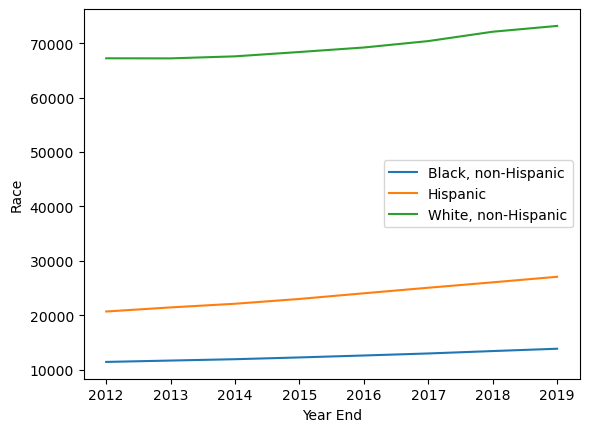

In [77]:
fig = plt.figure()
# plt.subplots_adjust(wspace=.3, hspace=.5)
# fig.suptitle('\n\nCorrelation between mouse age and the average tumor volume')
# fig.suptitle(t='\n\nCorrelation between mouse age and the average tumor volume', fontsize=18, ha='center', color='darkred')
# font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
ax = fig.add_subplot()
for n, race in df3.iterrows():
    x = df2.loc[(df2['Stratification1'] == race[0]), 'YearEnd'].values
    y = df2.loc[(df2['Stratification1'] == race[0]), 'DataValue'].values.astype(int)
    ax.plot(x, y, label=race[0])
    ax.set_xlabel('Year End')
    ax.set_ylabel('Race')
    ax.legend()
    # ax.set_title(f'{treatment} \n (slope: {z[0]:.3f}, r = {r:.2f})', fontdict=font)

In [57]:
output = df1
print(len(df1))

8


In [58]:
filename = 'C:/C_Drive/Bootcamp/ProjectData/output-%s.xlsx' % get_dt()
with pd.ExcelWriter(filename) as writer:
    output.to_excel(writer, sheet_name='data')